# 新闻分类-多分类问题

> 有单标签多分类和多标签多分类两类

## 路透社数据集

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# 样本大小
len(train_data)
len(test_data)

2246

In [3]:
# 整数列表表示单词索引
train_data[0][:5]

[1, 2, 2, 8, 43]

## 准备数据

In [4]:
# 与上一个实例同样的预处理方式

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

标签向量化两种方法：

- 将标签列表转换为整数张量，这里指的是如果有 a, b, c 3 类，它应该转换为 0, 1, 2 这种整数，就可以套入数学模型计算了。
- 使用 one-hot 编码（也称为分类编码），a, b, c 3 类的写法则成了下面这种矩阵形式

In [6]:
np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [7]:
# one-hot encoding 代码实现
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [8]:
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels  = to_one_hot(test_labels)

In [9]:
# Keras 库本身内置了 one-hot encoding 实现，直接可以调用
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels  = to_categorical(test_labels)

## 构建网络

这里需要输出 46 个分类，中间层尽量大于这个数字，这样可以避免永久性丢失相关信息（信息瓶颈）

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
# 使用分类交叉熵作为损失函数
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 留出验证集评估模型

In [12]:
x_val = x_train[:1000]
p_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
p_y_train = one_hot_train_labels[1000:]

In [13]:
## 训练 20 轮次
history = model.fit(p_x_train,
                    p_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 116us/step - loss: 2.6305 - accuracy: 0.5122 - val_loss: 1.7639 - val_accuracy: 0.6250
Epoch 2/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.4522 - accuracy: 0.6964 - val_loss: 1.3323 - val_accuracy: 0.7010
Epoch 3/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.0789 - accuracy: 0.7699 - val_loss: 1.1464 - val_accuracy: 0.7480
Epoch 4/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.8501 - accuracy: 0.8166 - val_loss: 1.0419 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.6794 - accuracy: 0.8555 - val_loss: 0.9635 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.5460 - accuracy: 0.8851 - val_loss: 0.9383 - val_accuracy: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.44

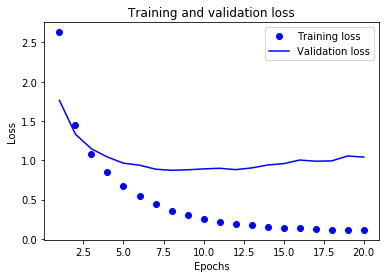

In [14]:
## 绘制训练损失和验证损失
## 就没有直接的函数调用吗？？？？？

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

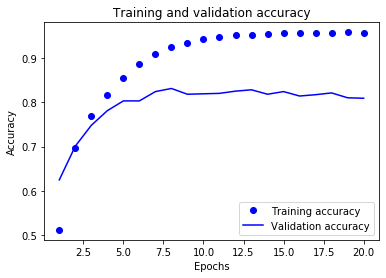

In [16]:
## 绘制训练精度和验证精度

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 在新的数据上预测

In [17]:
prediction = model.predict(x_test)

In [18]:
prediction

array([[2.77034303e-07, 3.33977778e-06, 1.77945822e-07, ...,
        5.61340201e-08, 1.76045020e-07, 2.90529156e-09],
       [4.12061519e-04, 1.31806377e-02, 7.19061381e-06, ...,
        6.25633945e-08, 1.87745499e-08, 2.40504796e-05],
       [5.10414876e-03, 9.82955813e-01, 1.46782068e-05, ...,
        8.74682064e-06, 1.19046746e-07, 2.87790681e-05],
       ...,
       [5.69346469e-07, 1.29913287e-05, 2.52958557e-06, ...,
        2.16044114e-07, 1.36899268e-06, 1.50399728e-08],
       [8.92372150e-03, 1.54714420e-01, 8.14427156e-03, ...,
        6.05434034e-05, 1.53022440e-04, 7.83342621e-05],
       [1.77697034e-03, 7.48163879e-01, 7.04478240e-04, ...,
        5.68508985e-05, 5.01939257e-06, 7.97051471e-05]], dtype=float32)

In [19]:
prediction[0].shape

(46,)

46 个元素依次对应相应的分类。

In [20]:
np.sum(prediction[0])  ## 概率和是1，这里可能受计算机浮点数计算影响

1.0000001

In [21]:
## 最大值所在的索引即对应了大概概率的分类
## 也就是最后的某一观测数据的预测标签了

np.argmax(prediction[0])

3

### 处理标签的不同方法

> 其实是殊途同归，底层实现是一样的

我们在编译模型时可以设定不同的损失函数，这样在处理的时候就不需要进行 one-hot 编码了（本质相同，外部接口看起来不同而已）。

In [22]:
# model.compile(optimizer='rmsprop',
#               loss='sparse_catagorical_crossentropy',  # 这里取代了 `catagorical_crossentropy`
#               metrics=['acc'])